In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('crop_yield.csv')

df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.0,392160,1356.2,22778368.48,74196.64,1.261818


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [11]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [14]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [ ]:
df['Crop'].value_counts()

Season
Kharif         8232
Rabi           5742
Whole Year     3717
Summer         1195
Autumn          414
Winter          389
Name: count, dtype: int64

In [18]:
df['Season'].value_counts()

Season
Kharif         8232
Rabi           5742
Whole Year     3717
Summer         1195
Autumn          414
Winter          389
Name: count, dtype: int64

In [19]:
df['State'].value_counts()

State
Karnataka            1432
Andhra Pradesh       1266
West Bengal          1094
Chhattisgarh          915
Bihar                 896
Madhya Pradesh        845
Uttar Pradesh         825
Tamil Nadu            822
Gujarat               817
Maharashtra           770
Uttarakhand           764
Odisha                760
Assam                 731
Nagaland              689
Puducherry            670
Meghalaya             649
Haryana               631
Jammu and Kashmir     631
Himachal Pradesh      616
Kerala                534
Manipur               444
Tripura               441
Mizoram               416
Telangana             397
Punjab                397
Arunachal Pradesh     292
Jharkhand             270
Goa                   246
Sikkim                226
Delhi                 203
Name: count, dtype: int64

In [ ]:
X = df.drop('Yield',    )
y = df['Yield']

num_features = X.select_dtypes(include=['int64', 'float64']).columns
char_features = X.select_dtypes(include=['string', 'object']).columns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

char_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("char", char_pipeline, char_features)
])

  (0, 0)	-1.8663753832052075
  (0, 1)	-0.14480228274277063
  (0, 2)	-0.06226657801199447
  (0, 3)	0.7511974591383891
  (0, 4)	-0.17987979466197013
  (0, 5)	-0.12174501783427887
  (0, 6)	1.0
  (0, 65)	1.0
  (0, 69)	1.0
  (1, 0)	-1.8663753832052075
  (1, 1)	-0.2364726938878747
  (1, 2)	-0.06246434637721084
  (1, 3)	0.7511974591383891
  (1, 4)	-0.247216987907071
  (1, 5)	-0.21938511881053258
  (1, 7)	1.0
  (1, 62)	1.0
  (1, 69)	1.0
  (2, 0)	-1.8663753832052075
  (2, 1)	-0.2444433813478469
  (2, 2)	-0.06248207303440101
  (2, 3)	0.7511974591383891
  (2, 4)	-0.25307191661398903
  (2, 5)	-0.22787486723339007
  (2, 14)	1.0
  :	:
  (19686, 2)	-0.0608060504805332
  (19686, 3)	-0.09983632081445533
  (19686, 4)	0.05775453055979959
  (19686, 5)	0.2228288854114673
  (19686, 30)	1.0
  (19686, 62)	1.0
  (19686, 77)	1.0
  (19687, 0)	-1.8663753832052075
  (19687, 1)	0.13075615933343337
  (19687, 2)	-0.06246129372747383
  (19687, 3)	-0.09983632081445533
  (19687, 4)	0.02253374131566678
  (19687, 5)	0.171

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

X_train_prepared = full_pipeline.fit_transform(x_train)
X_test_prepared = full_pipeline.transform(x_test)
print("x:", X.shape)
print("y:", y.shape)
print("x_train:", x_train.shape)
print("x_test:", x_test.shape) 
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x: (19689, 9)
y: (19689,)
x_train: (13782, 9)
x_test: (5907, 9)
y_train: (13782,)
y_test: (5907,)


Mean Absolute Error: 63.517787356570835
Mean Squared Error: 384.19727249944816
Train R2 Score: 0.8494993219535373
Test R2 Score: 0.8302562174496095


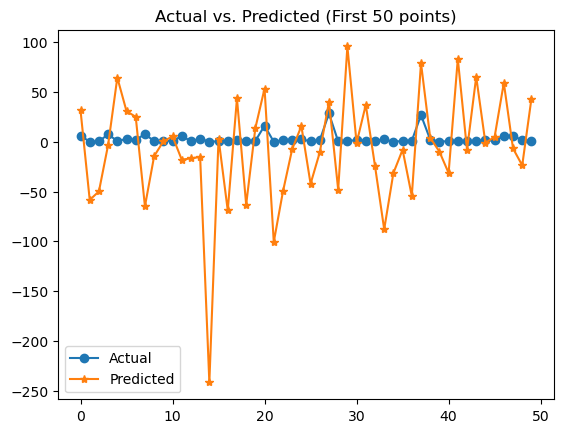

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

len_reg = make_pipeline(full_pipeline, LinearRegression())
len_reg.fit(x_train, y_train)

y_pred = len_reg.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = root_mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Train R2 Score:", len_reg.score(x_train, y_train))
print("Test R2 Score:", len_reg.score(x_test, y_test))

# plt.scatter(y_test, y_pred, marker='*')
# plt.xlabel("Actual values")
# plt.ylabel("Predicted values")
# plt.title("Actual vs. Predicted values")
# plt.show()

plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='*')
plt.legend()
plt.title("Actual vs. Predicted (First 50 points)")
plt.show()


Mean Absolute Error: 12.229596482522092
Mean Squared Error: 200.24002356919505
Train R2 Score: 1.0
Test R2 Score: 0.9538908521128541


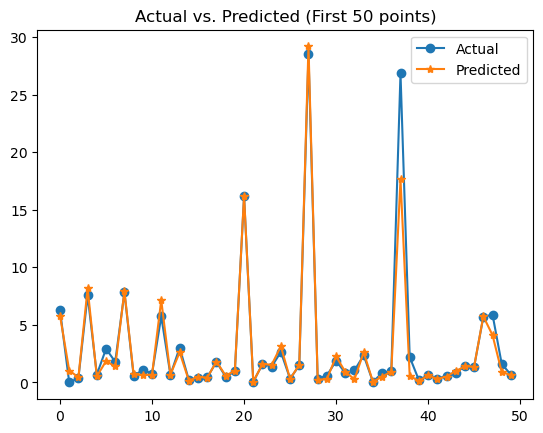

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

des_reg = make_pipeline(full_pipeline, DecisionTreeRegressor())
des_reg.fit(x_train, y_train)

y_pred = des_reg.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = root_mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Train R2 Score:", des_reg.score(x_train, y_train))
print("Test R2 Score:", des_reg.score(x_test, y_test))

plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='*')
plt.legend()
plt.title("Actual vs. Predicted (First 50 points)")
plt.show()


Mean Absolute Error: 7.851153366670839
Mean Squared Error: 126.91564938702348
Train R2 Score: 0.9954806061084276
Test R2 Score: 0.9814768146073846


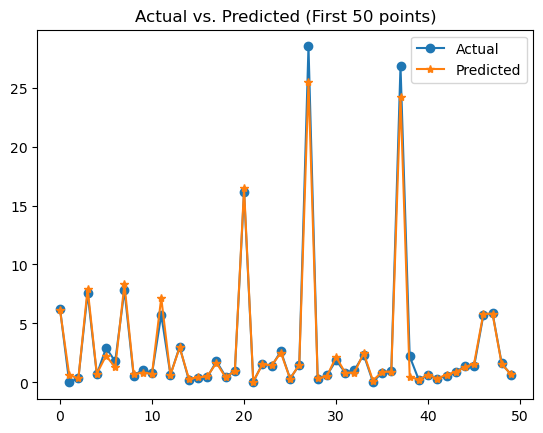

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

ran_reg = make_pipeline(full_pipeline, RandomForestRegressor())
ran_reg.fit(x_train, y_train)

y_pred = ran_reg.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = root_mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Train R2 Score:", ran_reg.score(x_train, y_train))
print("Test R2 Score:", ran_reg.score(x_test, y_test))

plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='*')
plt.legend()
plt.title("Actual vs. Predicted (First 50 points)")
plt.show()


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

models = {
    "Linear Regression": make_pipeline(full_pipeline, LinearRegression()),
    "Decision Tree": make_pipeline(full_pipeline, DecisionTreeRegressor()),
    "Random Forest": make_pipeline(full_pipeline, RandomForestRegressor())
}

for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train,
                             scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-scores)
    print(f"{name}:\n  RMSE Mean: {rmse_scores.mean():.2f}, Std: {rmse_scores.std():.2f}\n")


Linear Regression:
  RMSE Mean: 331.68, Std: 52.89

Decision Tree:
  RMSE Mean: 192.43, Std: 27.28

Random Forest:
  RMSE Mean: 150.60, Std: 46.79



In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [30, 50, 100],
    'max_features': [5, 10, 15],
    # add more if you want
}

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    forest_reg,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1
)

grid_search.fit(X_train_prepared, y_train)

best_model = grid_search.best_estimator_
X_test_prepared = full_pipeline.transform(x_test)
final_predictions = best_model.predict(X_test_prepared)

from sklearn.metrics import mean_squared_error
import numpy as np

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print("Final RMSE on Test Set:", final_rmse)



Final RMSE on Test Set: 112.6255946548104


In [57]:
import joblib

joblib.dump(best_model, "crop.pkl")

['crop.pkl']